In [1]:
import numpy as np

from GA.GeneticAlgorithm import GeneticAlgorithm
from GA.Operators.MutationMethod import MutationMethod
from function_modules.function_module import *

In [2]:
# Shared directory to save results 
shared_data_dir = 'Data/mutation/'

# Shared GA parameters
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
}

# Testing parameters
target_expressions = [0, 0.5, 1]
lineages = 10
test_cases = 11

In [3]:
# Run for mutConstant, varying mutation rate
param_ranges = {
    'mutation_method' : ['mutConstant'],
    'mutation_rate' : np.linspace(0.01, 1.0, test_cases)
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutConstant_1.csv')

Processing combinations:   0%|          | 0/300 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 300/300 [14:30<00:00,  2.90s/it, Elapsed=14.51min, ETA=0.00s]  


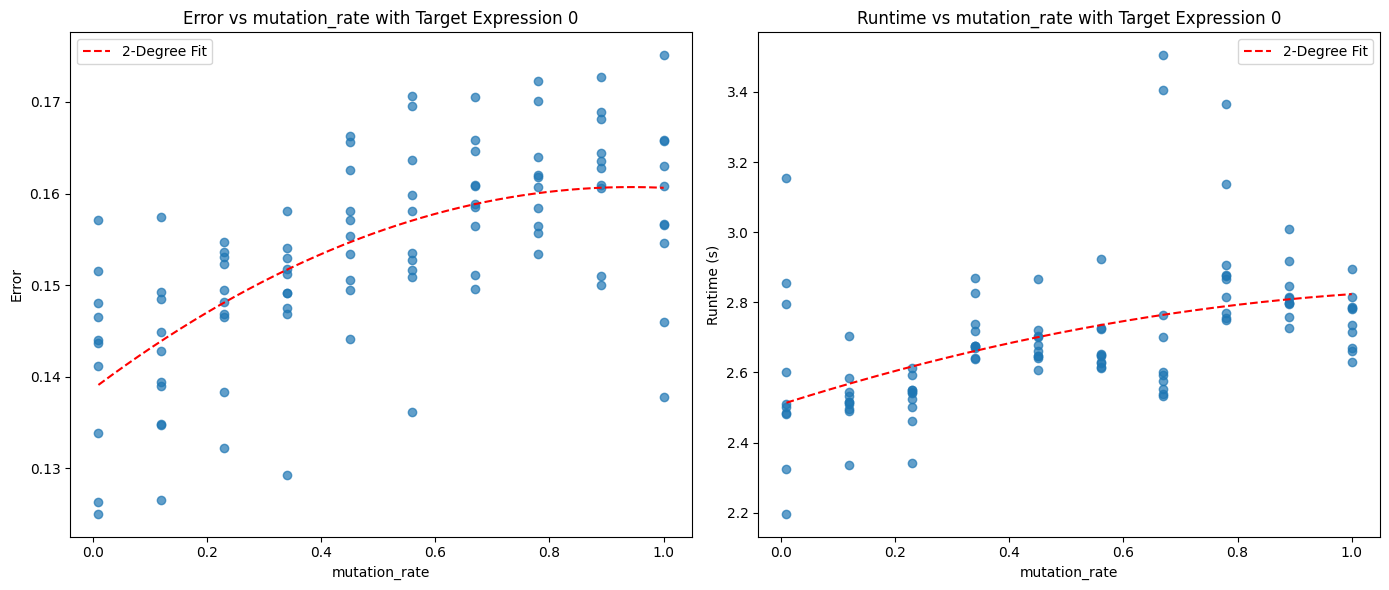

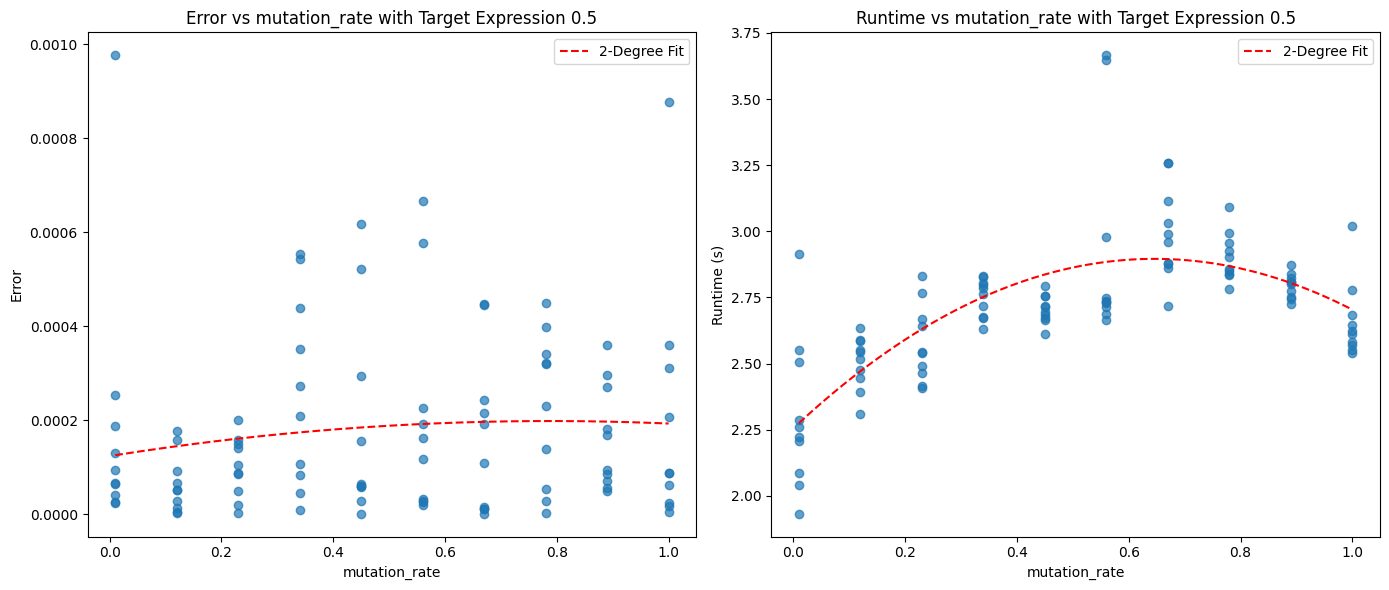

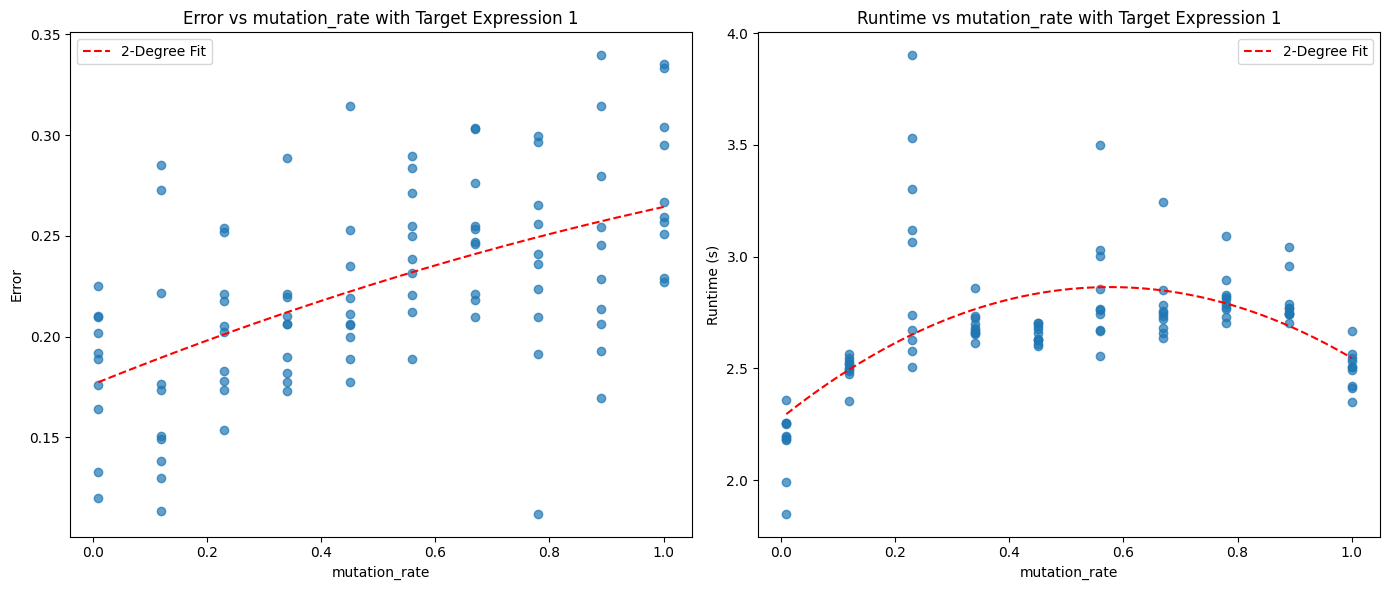

In [4]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'mutation_rate', polynomial_degree=2)

In [12]:
# Run for mutConstant, varying mutation rate
param_ranges = {
    'mutation_method' : ['mutConstant'],
    'mutation_rate' : np.linspace(0, 0.2, test_cases)
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutConstant_2.csv')

Processing combinations: 100%|██████████| 300/300 [10:51<00:00,  2.17s/it, Elapsed=10.86min, ETA=0.00s] 


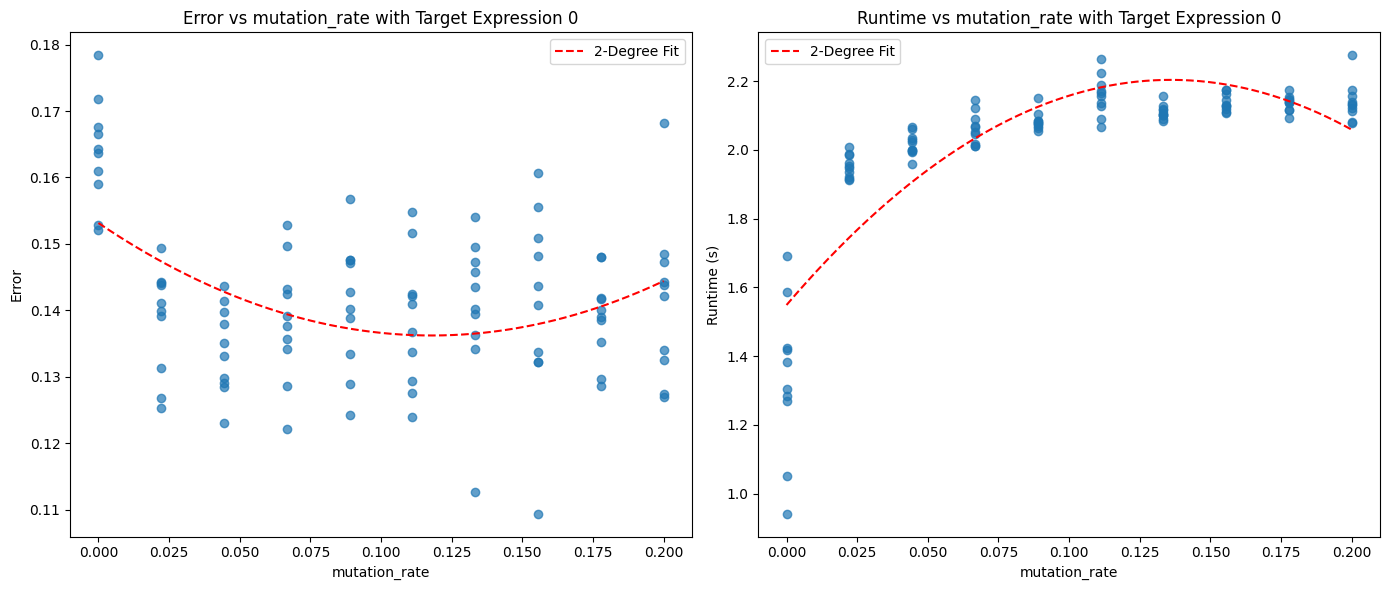

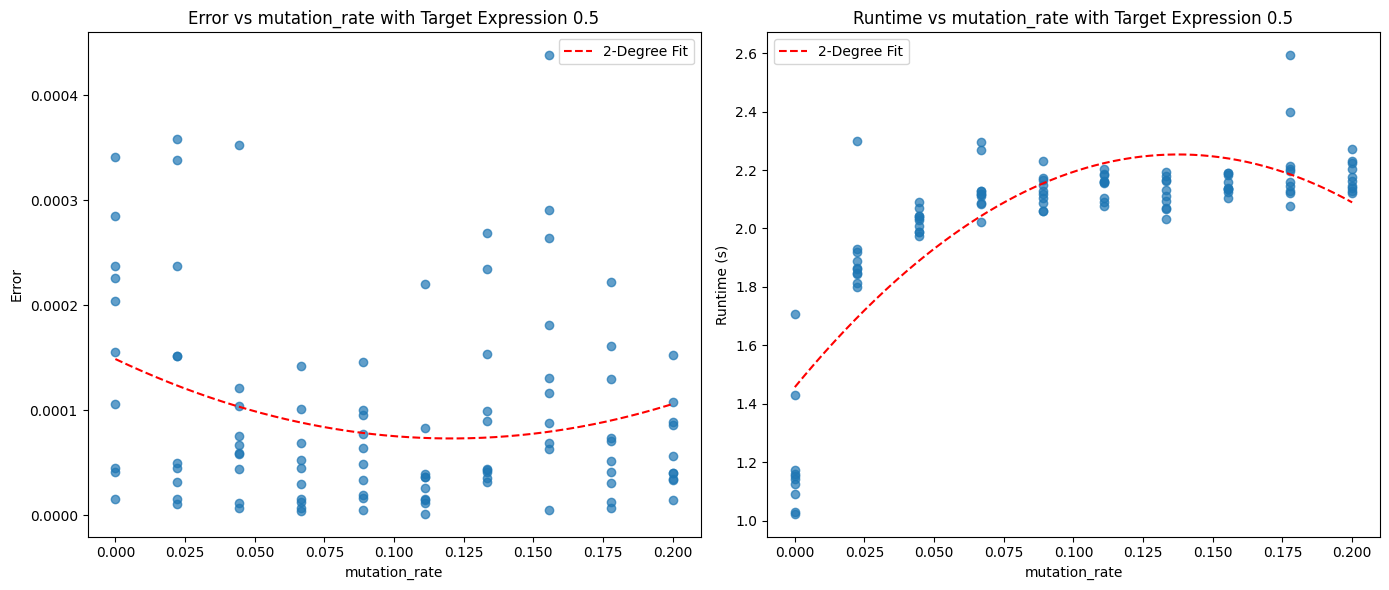

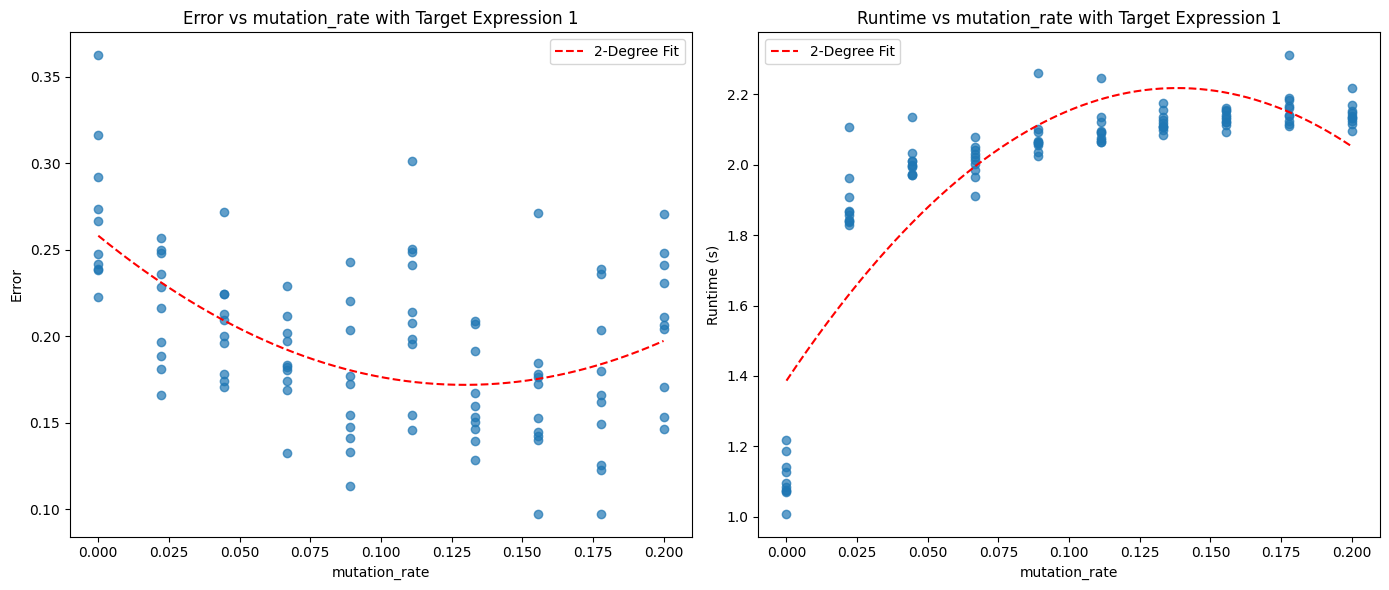

In [13]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'mutation_rate', polynomial_degree=2)

In [4]:
# Test to see if mutation_prob affects the optimal mutation_rate

param_ranges = {
    'mutation_method' : ['mutConstant'],
    'mutation_prob' : np.linspace(0, 1, test_cases),
    'mutation_rate' : np.linspace(0, 1, test_cases)
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutConstant_3.csv')

Processing combinations: 100%|██████████| 3000/3000 [2:22:06<00:00,  2.84s/it, Elapsed=2.37h, ETA=0.00s]        


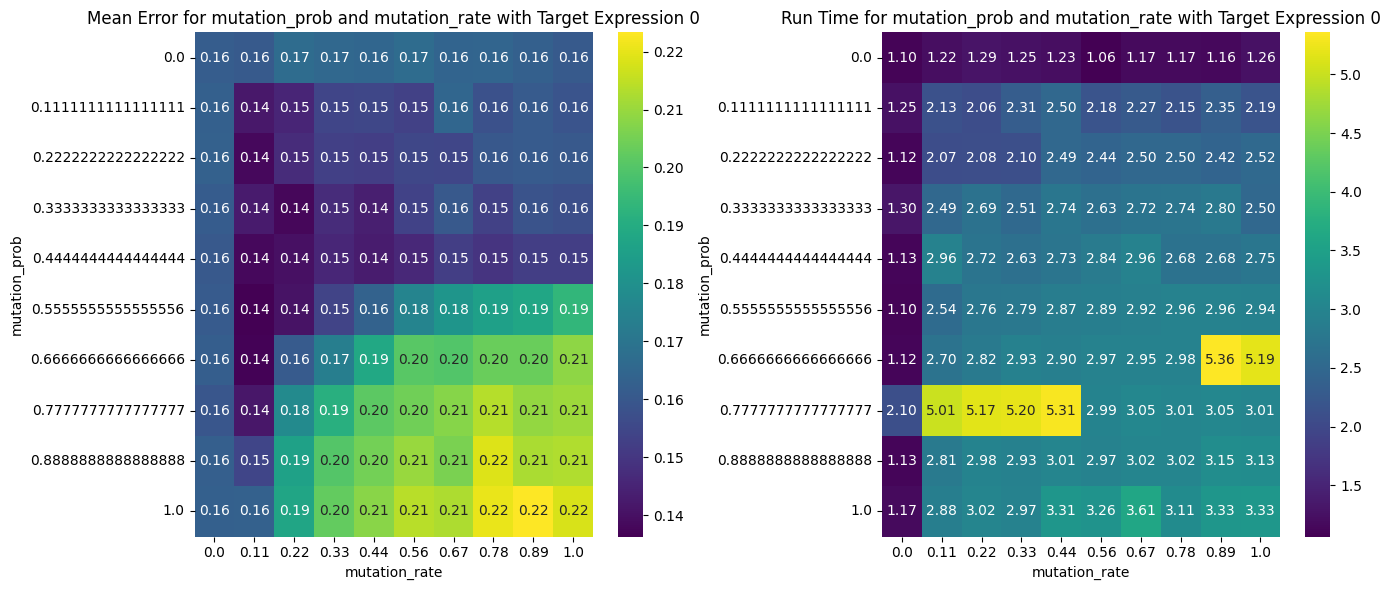

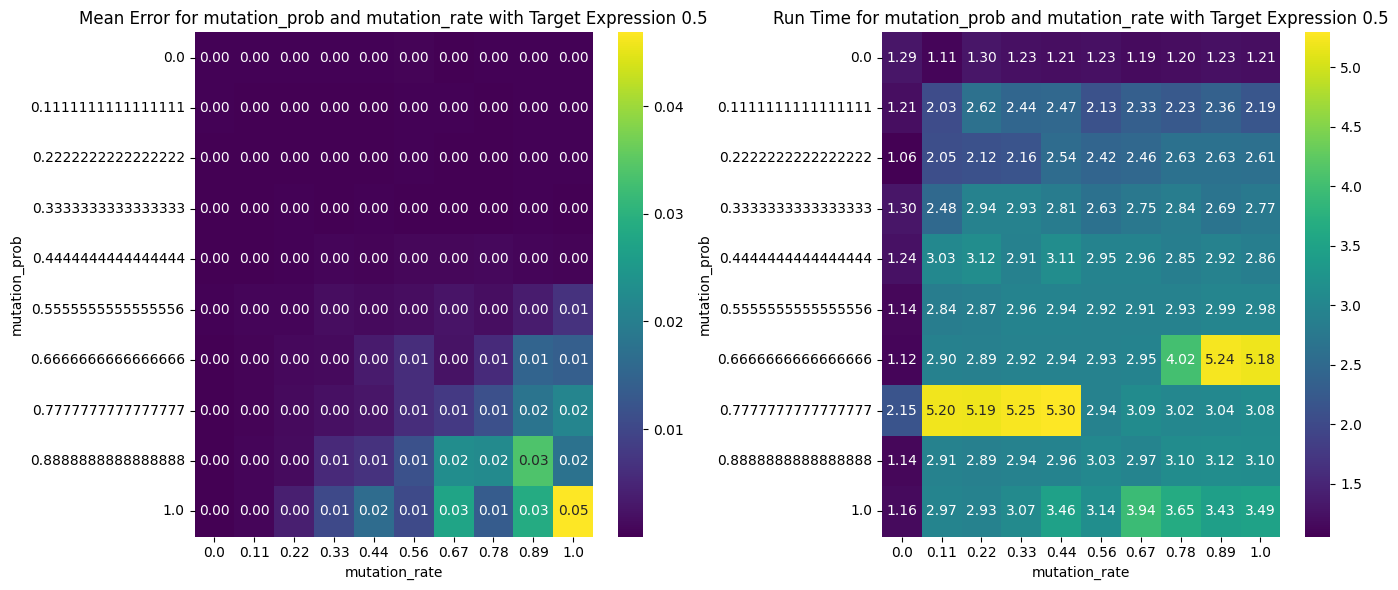

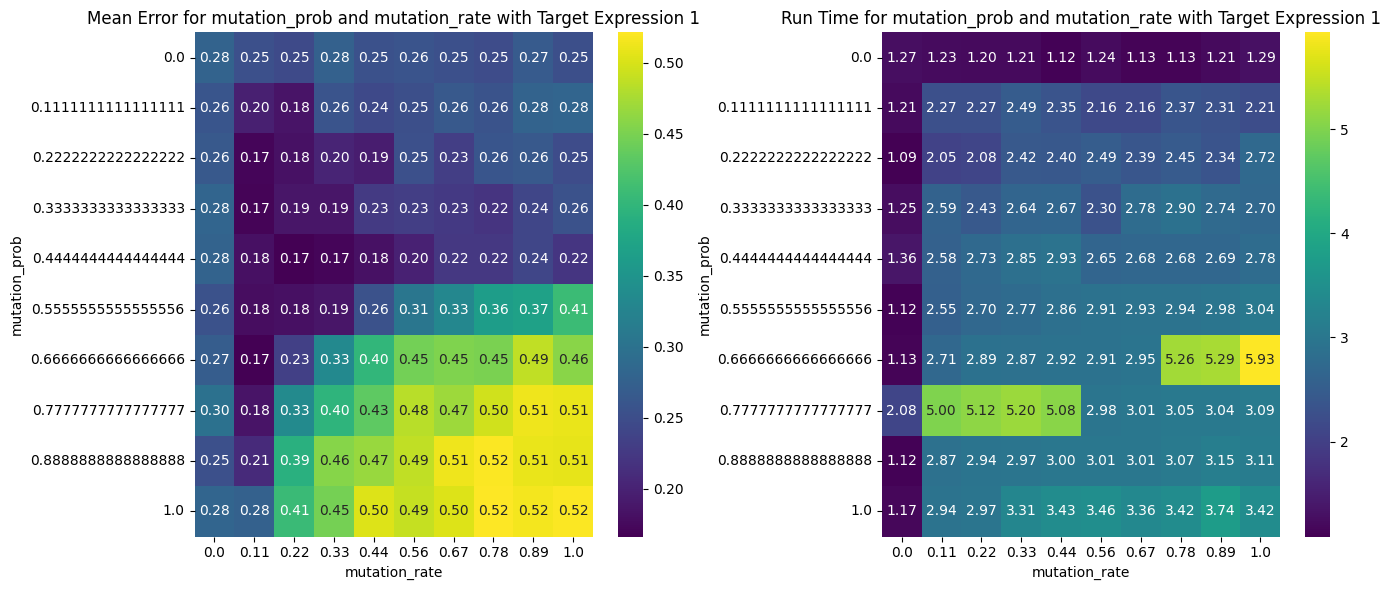

In [6]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'mutation_prob', 'mutation_rate')

In [5]:
# Find optimal mutation_rate_start and mutation_rate_end for mutLinear

param_ranges = {
    'mutation_method' : ['mutLinear'],
    'mutation_rate_start' : np.linspace(0, 1, test_cases),
    'mutation_rate_end' : np.linspace(1, 0, test_cases)
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutLinear.csv')

Processing combinations: 100%|██████████| 3000/3000 [2:50:36<00:00,  3.41s/it, Elapsed=2.84h, ETA=0.00s]     


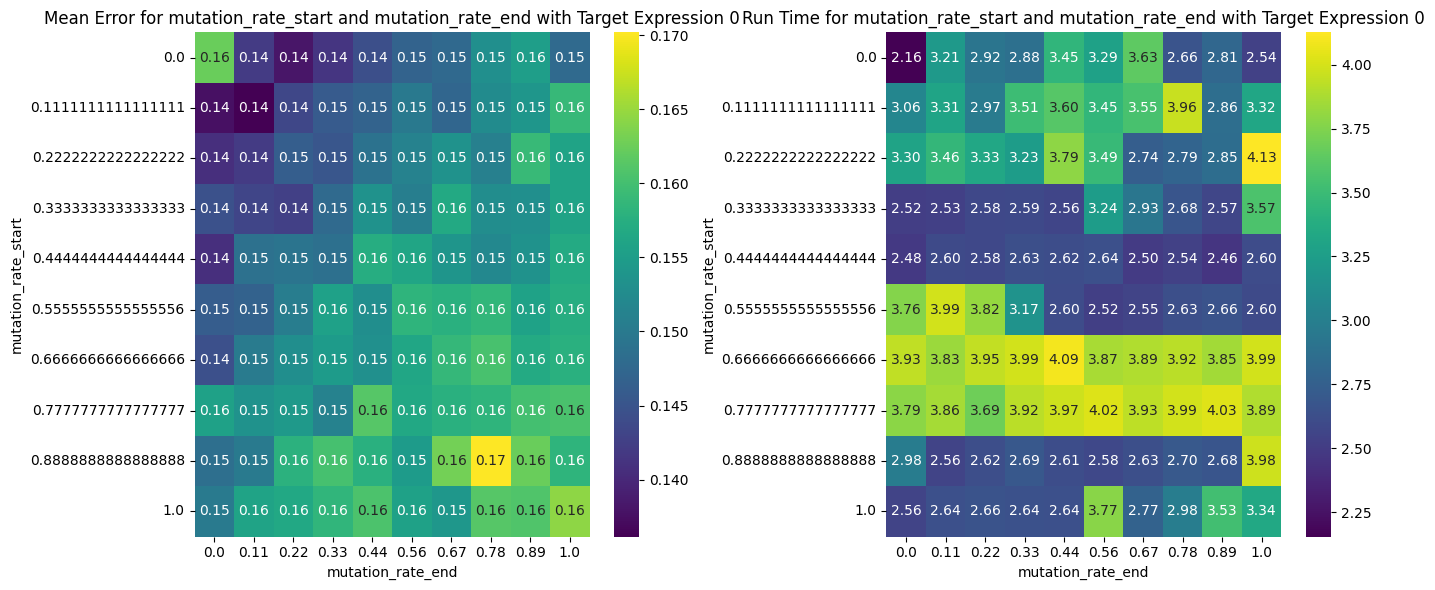

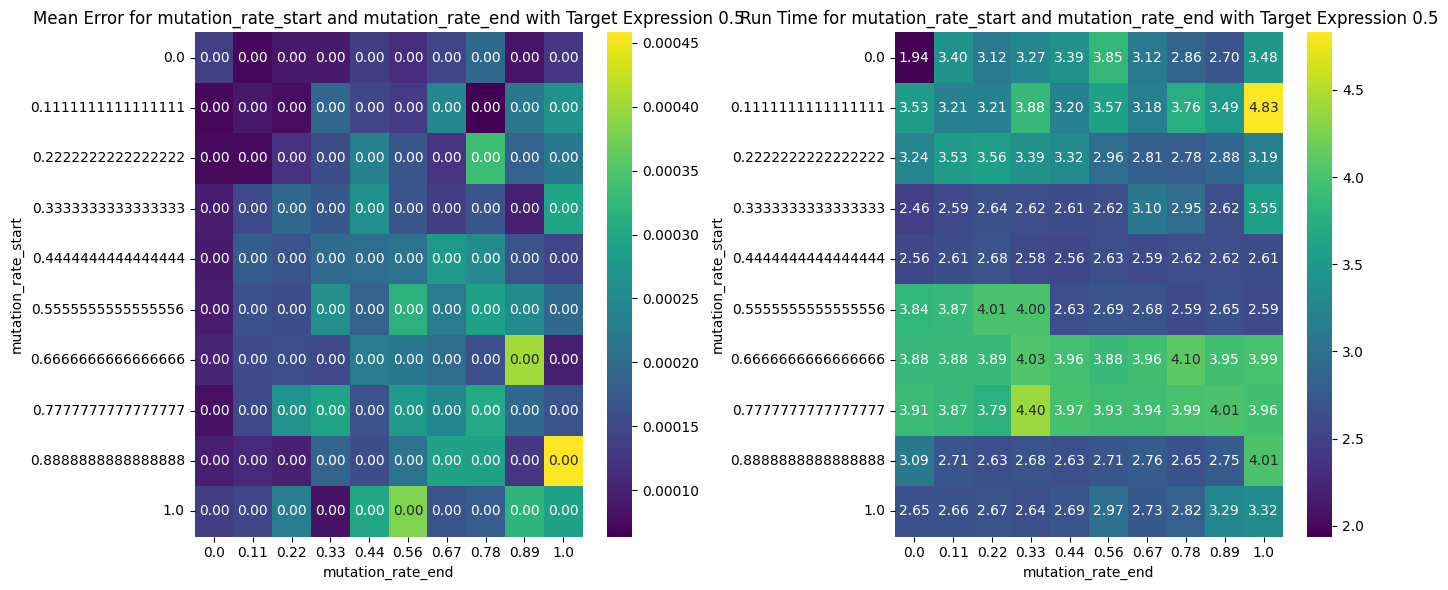

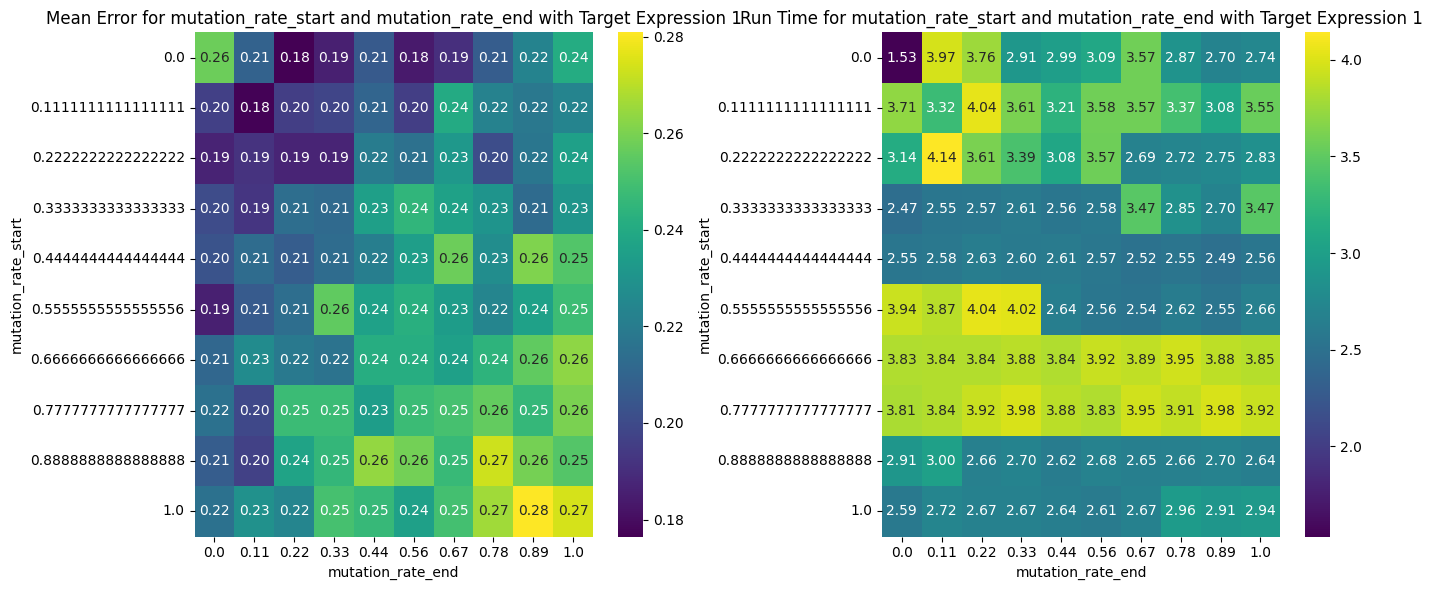

In [6]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'mutation_rate_start', 'mutation_rate_end')

In [7]:
# Find optimal mutation_rate_start and mutation_rate_end for mutExponential

param_ranges = {
    'mutation_method' : ['mutExponential'],
    'mutation_rate_start' : np.linspace(0, 1, test_cases),
    'mutation_rate_end' : np.linspace(1, 0, test_cases)

}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutExponential_1.csv')

Processing combinations:   0%|          | 0/3000 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 3000/3000 [2:27:51<00:00,  2.96s/it, Elapsed=2.46h, ETA=0.00s]     


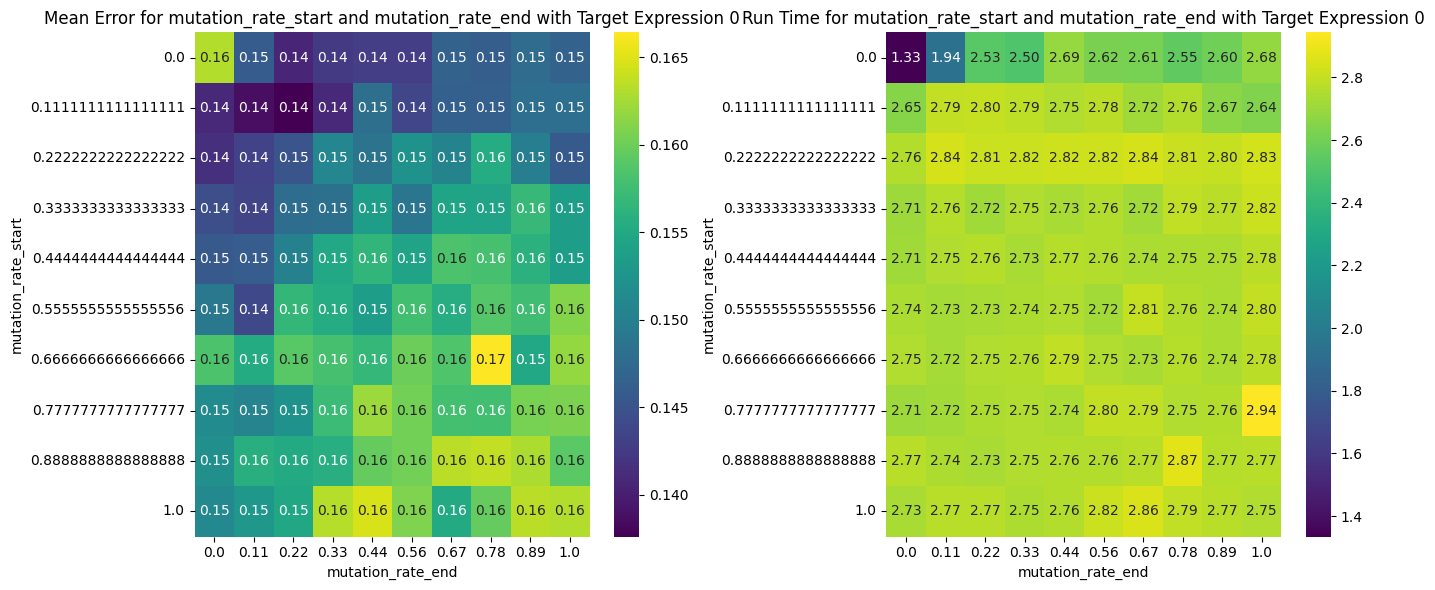

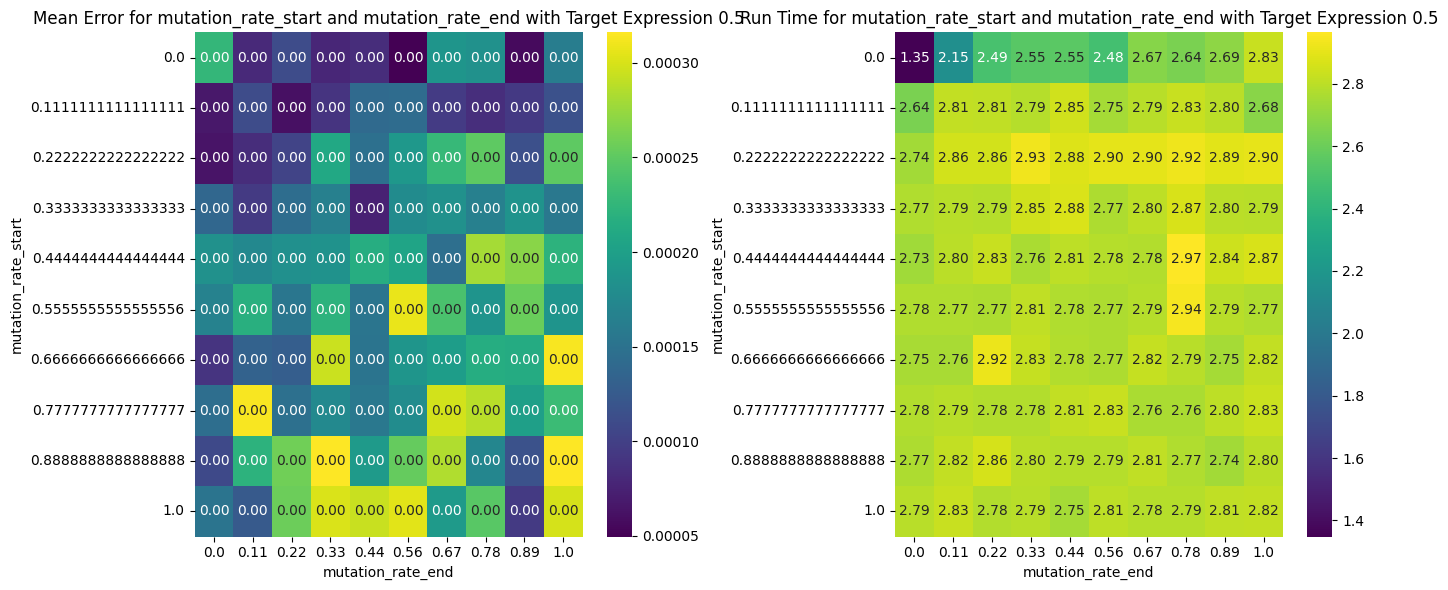

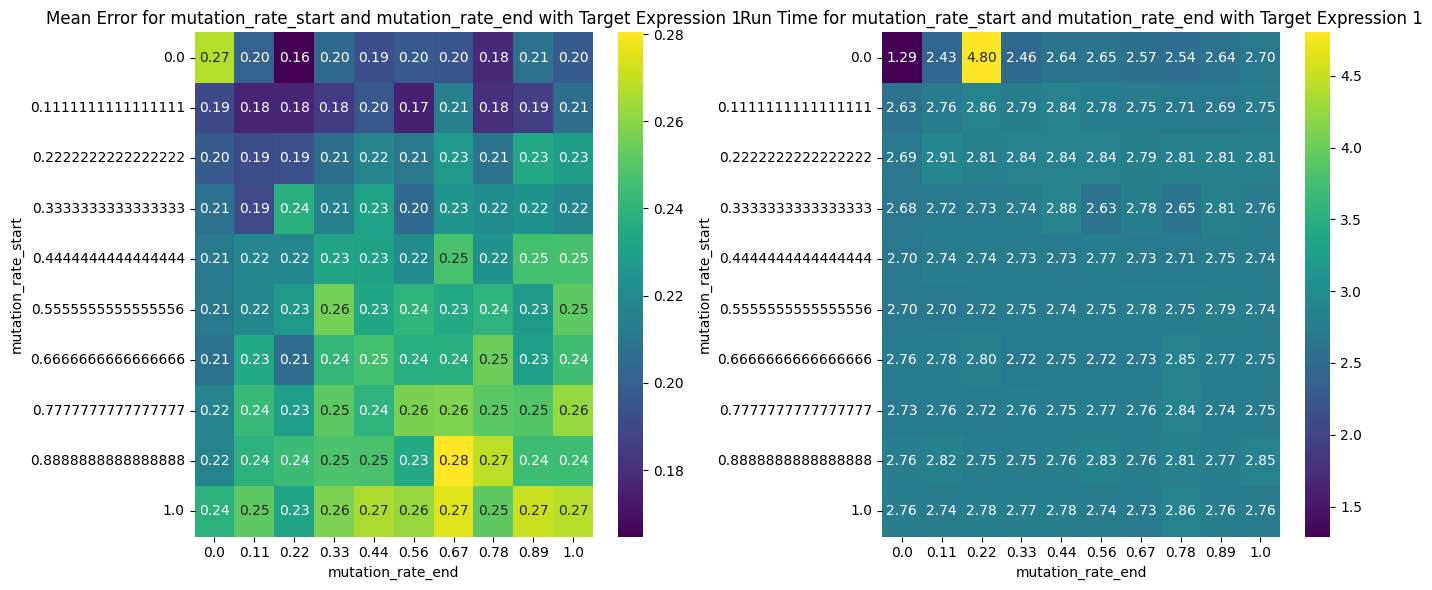

In [8]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'mutation_rate_start', 'mutation_rate_end')

In [6]:
# Find optimal mutation_rate_start and mutation_rate_end for mutExponential
# We could have tested negative degrees, but because high degrees are better, we only need to test positive

param_ranges = {
    'mutation_method' : ['mutExponential'],
    'mutation_rate_start' : [0.1],
    'mutation_rate_end' : [1],
    'mutation_rate_degree' : [1, 2, 3, 4]

}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}mutExponential_2.csv')

Processing combinations:   0%|          | 0/120 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 120/120 [04:59<00:00,  2.49s/it, Elapsed=4.99min, ETA=0.00s] 


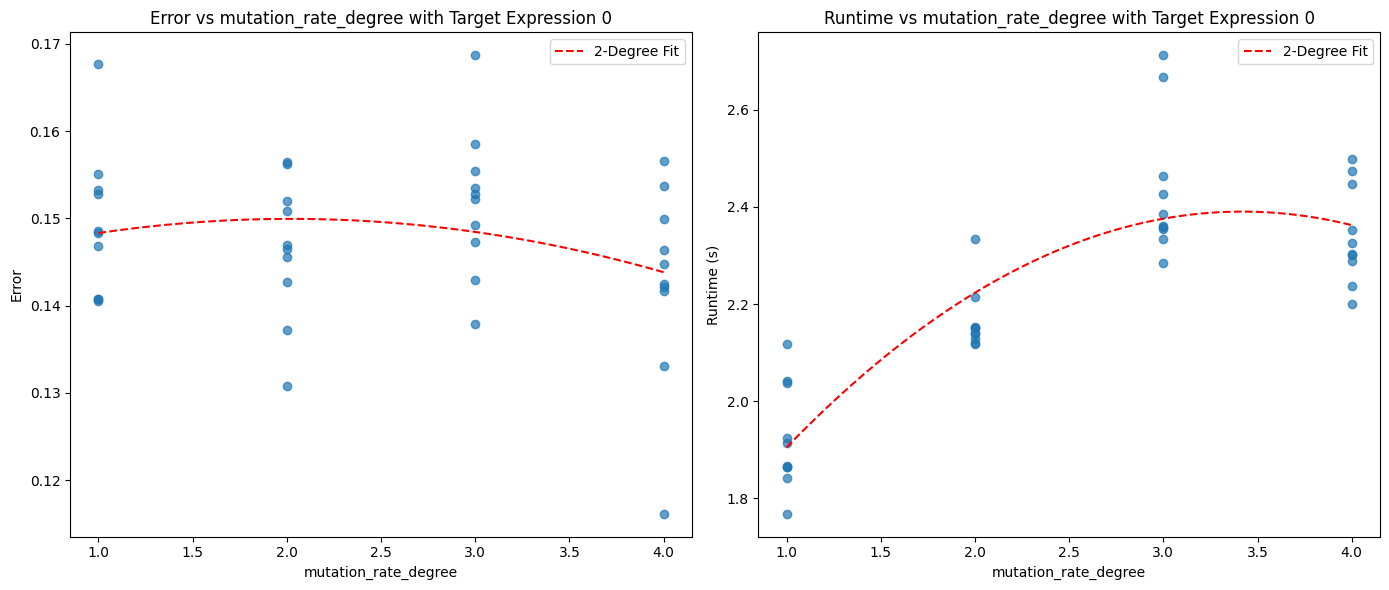

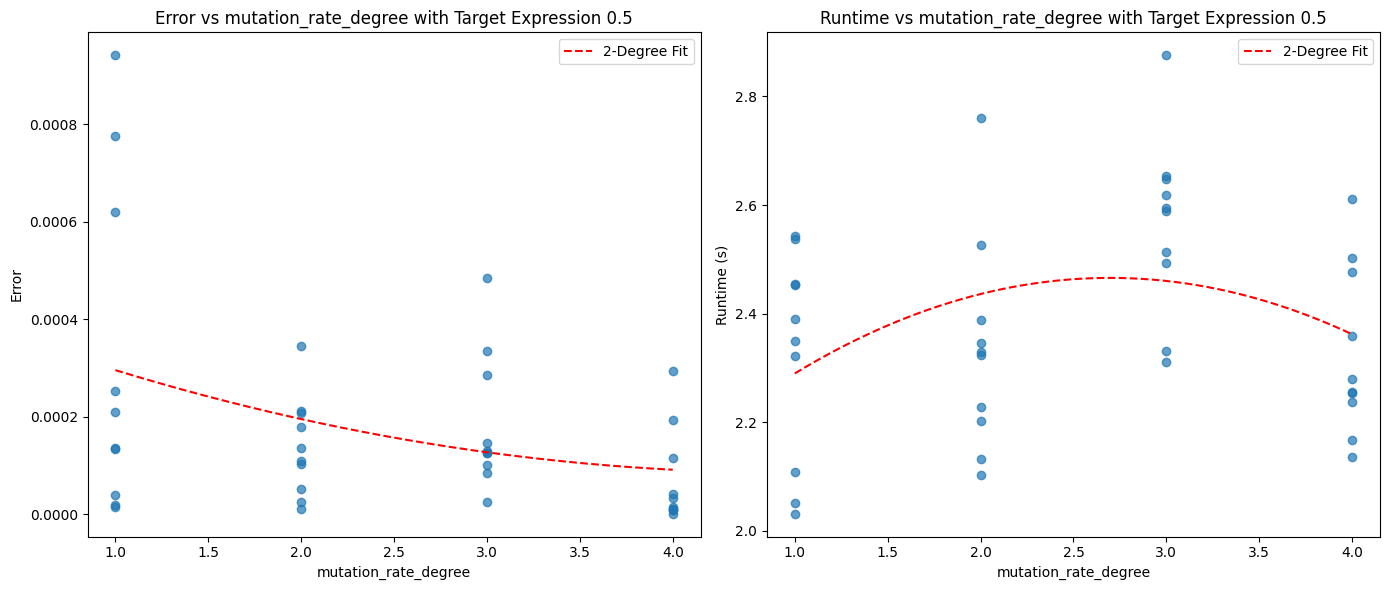

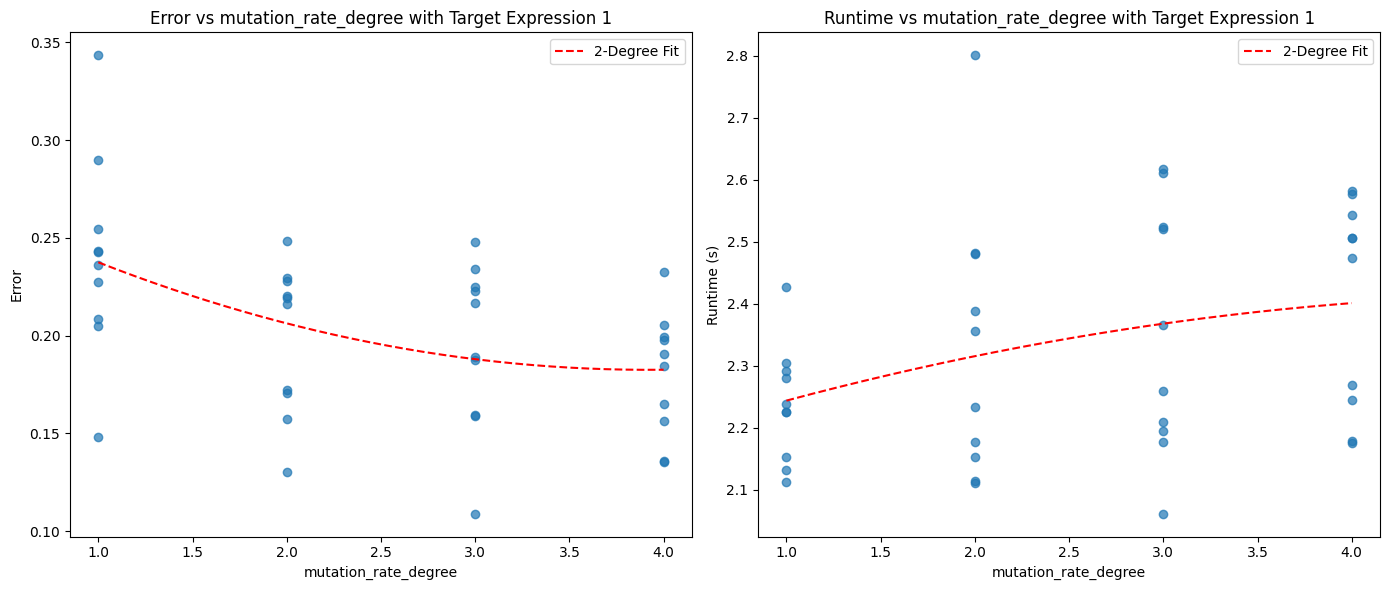

In [7]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'mutation_rate_degree', polynomial_degree=2)

In [7]:
# Evaluate mutConstant
param_ranges = {
    'mutation_method' : ['mutConstant'],
    'mutation_rate' : [0.1],
    'mutation_prob' : [0.45]
}
mutConstant_df = test_params(param_ranges, target_expressions, lineages, kwargs)

# Evaluate mutLinear
param_ranges = {
    'mutation_method' : ['mutLinear'],
    'mutation_rate_start' : [0.4],
    'mutation_rate_end' : [1],
    'mutation_prob' : [0.45]
}
mutLinear_df = test_params(param_ranges, target_expressions, lineages, kwargs)

# Evaluate mutExponential
param_ranges = {
    'mutation_method' : ['mutExponential'],
    'mutation_rate_start' : [0.1],
    'mutation_rate_end' : [1],
    'mutation_rate_degree' : [4],
    'mutation_prob' : [0.45]
}
mutExponential_df = test_params(param_ranges, target_expressions, lineages, kwargs)

# Concatenate all results, and save to csv
results_df = pd.concat([mutConstant_df, mutLinear_df, mutExponential_df])
results_df.to_csv(f'{shared_data_dir}mutation_comparison.csv', index=False)

Processing combinations: 100%|██████████| 30/30 [01:24<00:00,  2.81s/it, Elapsed=1.40min, ETA=0.00s] 


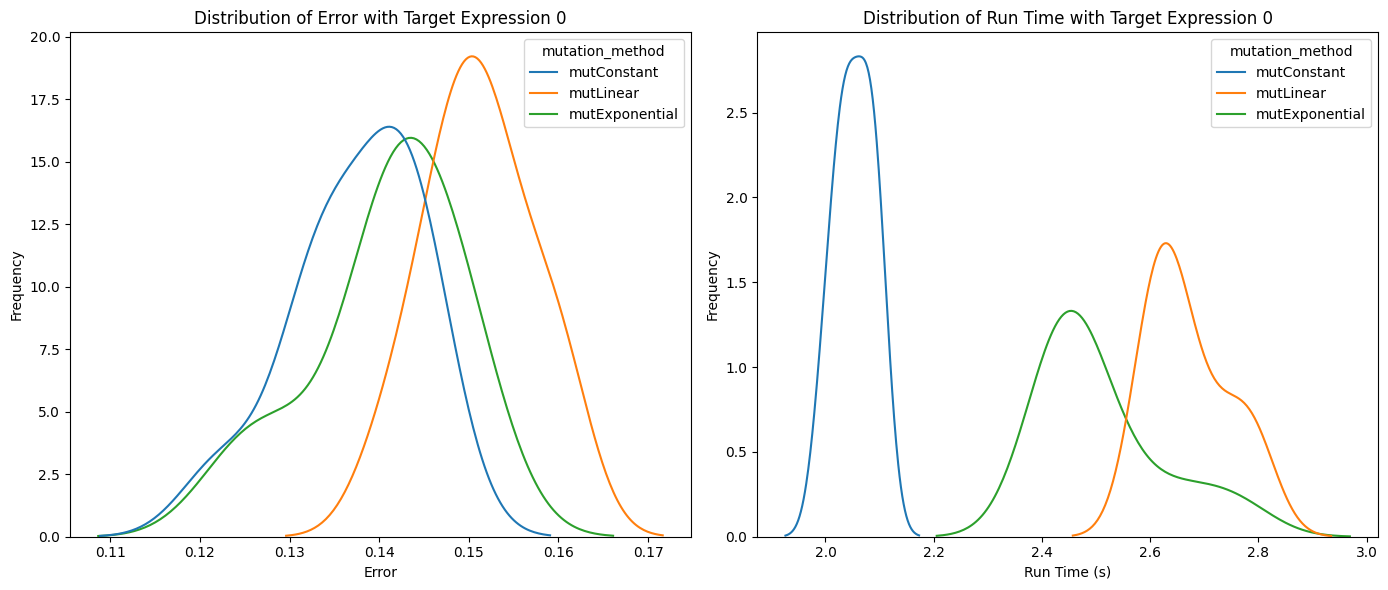

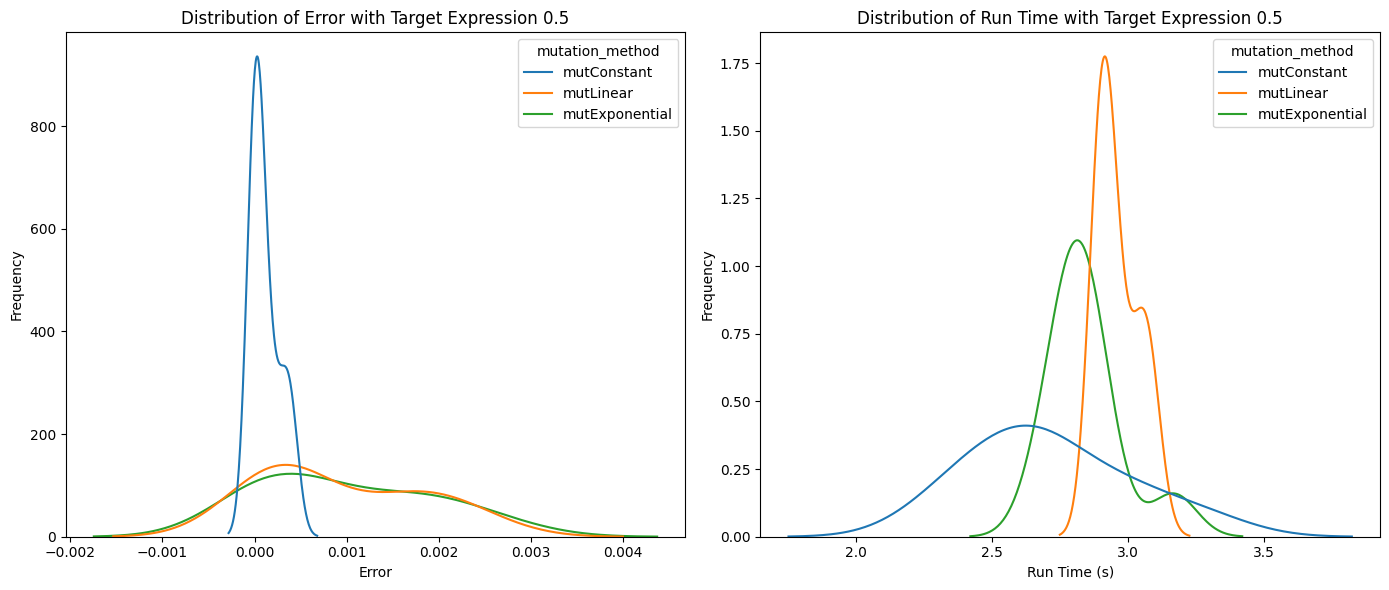

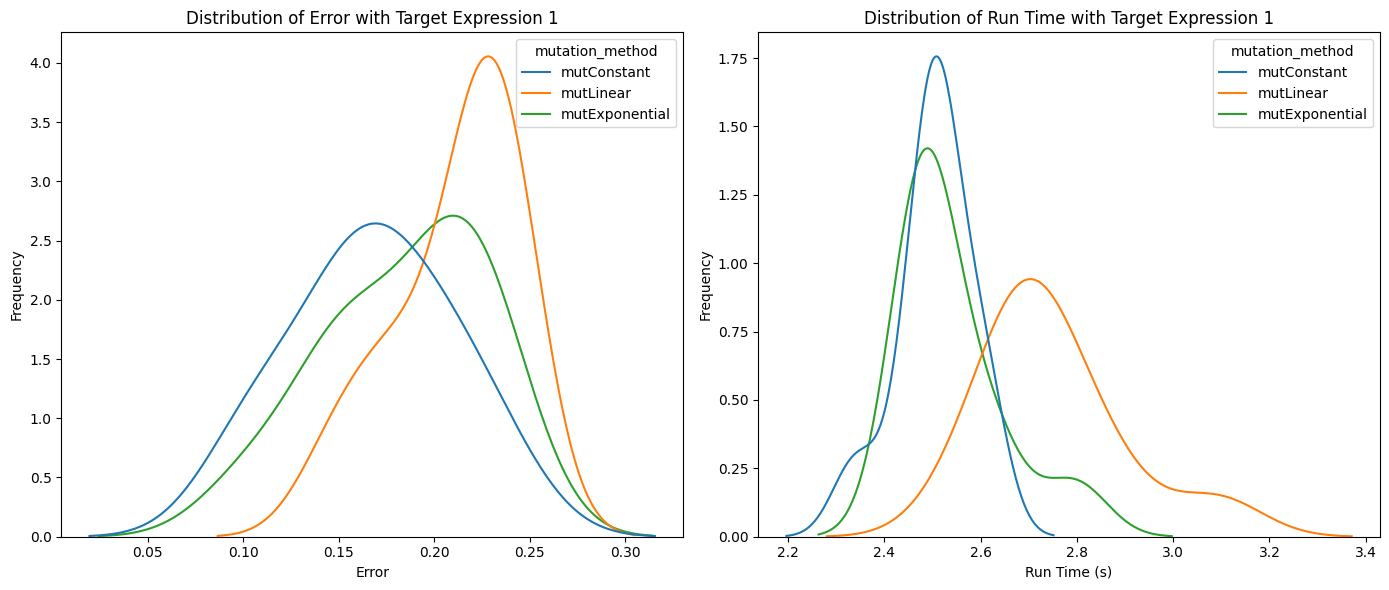

In [8]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filtered_df, target_expression, 'mutation_method')